In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import main

In [2]:
result = main.run(total_periods = 1000000, alpha = 0.125, gamma = 0.95, beta = 1*1e-5,temp_max = 10, temp_min = 0.0001)

[0.0001  0.00012 0.00014 ... 0.0001  0.0001  0.0001 ]


 31%|███       | 311632/1000000 [01:04<02:22, 4839.52it/s]


In [3]:
prices = np.array([2.02498094,1.69895138])
quantity = result.env.demand.get_quantity_demand(prices,result.env.quality_array)
(prices - result.env.marginal_cost_array)*quantity
quantity

array([0.17272573, 0.63639738])

In [6]:
result.env.agents

[QLearning(quality=2, marginal_cost=1, Q={(1.3729218286936813, 1.3729218286936813): {1.3729218286936813: 0, 1.419497479424908: 0, 1.4660731301561347: 0, 1.5126487808873614: 0, 1.5592244316185881: 0, 1.6058000823498149: 0, 1.6523757330810418: 0, 1.6989513838122683: 0, 1.7455270345434952: 0, 1.7921026852747217: 0, 1.8386783360059487: 0, 1.8852539867371751: 0, 1.931829637468402: 0, 1.9784052881996288: 0, 2.0249809389308555: 0}, (1.3729218286936813, 1.419497479424908): {1.3729218286936813: 0, 1.419497479424908: 0, 1.4660731301561347: 0, 1.5126487808873614: 0, 1.5592244316185881: 0, 1.6058000823498149: 0, 1.6523757330810418: 0, 1.6989513838122683: 0, 1.7455270345434952: 0, 1.7921026852747217: 0, 1.8386783360059487: 0, 1.8852539867371751: 0, 1.931829637468402: 0, 1.9784052881996288: 0, 2.0249809389308555: 0}, (1.3729218286936813, 1.4660731301561347): {1.3729218286936813: 0, 1.419497479424908: 0, 1.4660731301561347: 0, 1.5126487808873614: 0, 1.5592244316185881: 0, 1.6058000823498149: 0, 1.652

In [4]:
result.print_results()

Name              Bertrand-Nash Price    Monopoly Price    Average Price    Bertrand-Nash Profit    Monopoly Profit    Average Profits    Normalised Profits
--------------  ---------------------  ----------------  ---------------  ----------------------  -----------------  -----------------  --------------------
QLearning                     1.47292           1.92498          1.69477                0.222925            0.33749           0.274444              0.44969
ConstantPricer                1.47292           1.92498          1.69895                0.222925            0.33749           0.297196              0.648281
Name            Description
--------------  --------------------------------------------------------------------------------------------------
QLearning       : quality=2, mc=1, alpha=0.125, gamma=0.95, policy = (Boltzmann: temp_max = 10, temp_min = 0.0001)
ConstantPricer  Constant Price at: 1.69895




# Price History of Agents

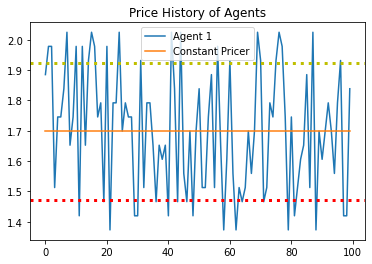

In [3]:
agent_1 = np.array(result.price_history)[-100:,0]
agent_2 = np.array(result.price_history)[-100:,1]
df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.plot(df)
plt.axhline(y=1.924, linewidth=3,color='y',linestyle="dotted")
plt.axhline(y=1.472, linewidth=3,color='r',linestyle="dotted")
plt.legend(['Agent 1', "Constant Pricer"])
plt.title("Price History of Agents")
plt.show()

# Reward history of agents

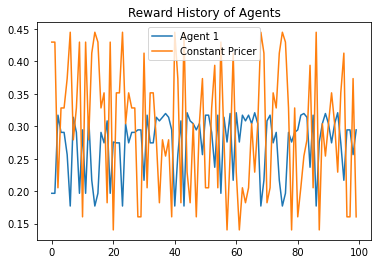

In [4]:
agent_1 = np.array(result.reward_history)[-100:,0]
agent_2 = np.array(result.reward_history)[-100:,1]
df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.plot(df)
plt.legend(['Agent 1', "Constant Pricer"])
plt.title("Reward History of Agents")
plt.show()

# keys with highest Qvalue average sorted

In [27]:
actions = result.env.action_space
new_dict1 = {}
new_dict2={}
for a in actions:
    new_dict1[a]=0
    new_dict2[a]=0

for state,action_space in result.env.agents[0].Q.items():
    for a in actions:
        new_dict1[a] += action_space[a]
        
for key,value in new_dict1.items():
    new_dict1[key] = new_dict1[key]/(len(actions)**2)

"""
for state,action_space in result.env.agents[1].Q.items():
    for a in actions:
        new_dict2[a] += action_space[a]
        
for key,value in new_dict2.items():
    new_dict2[key] = new_dict2[key]/(len(actions)**2)
"""
print(sorted(new_dict1, key=lambda k: new_dict1[k],reverse=True))
#print(sorted(new_dict2, key=lambda k: new_dict2[k],reverse=True))

[1.6058000823498149, 1.8386783360059487, 1.419497479424908, 1.4660731301561347, 1.7921026852747217, 1.7455270345434952, 1.8852539867371751, 1.3729218286936813, 1.5126487808873614, 1.9784052881996288, 1.6523757330810418, 1.5592244316185881, 1.6989513838122683, 1.931829637468402, 2.0249809389308555]


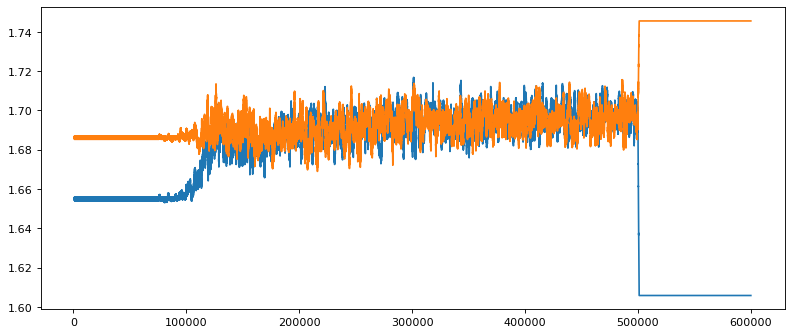

In [63]:

x =np.linspace(0,len(np.array(result.price_history)),num=len(np.array(result.price_history)))
agent_1 = np.array(result.price_history)[:,0]
agent_2 = np.array(result.price_history)[:,1]

df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.figure(figsize=(12, 5), dpi=80)
plt.plot(df['agent_1'].rolling(1000).mean())
plt.plot(df['agent_2'].rolling(1000).mean())

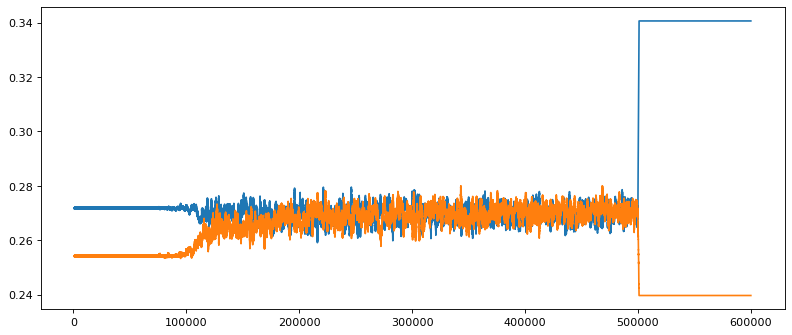

In [28]:

x =np.linspace(0,len(np.array(result.reward_history)),num=len(np.array(result.reward_history)))
agent_1 = np.array(result.reward_history)[:,0]
agent_2 = np.array(result.reward_history)[:,1]

df = pd.DataFrame({'agent_1': agent_1, 'agent_2': agent_2})
plt.figure(figsize=(12, 5), dpi=80)
plt.plot(df['agent_1'].rolling(1000).mean())
plt.plot(df['agent_2'].rolling(1000).mean())

# Average Normalised Profits for different number of firms Box-plot

In [ ]:

two_firm = []
three_firm = []
four_firm = []

for i in range(20):
    two_firm.append(main.run(num_agents=2,alpha = 0.125,beta = 1*1e-5,temp_max = 3, temp_min = 0.0001).normalised_profits.mean())
for i in range(20):
    three_firm.append(main.run(num_agents=3,alpha = 0.125,beta = 1*1e-5,temp_max = 3, temp_min = 0.0001).normalised_profits.mean())
for i in range(20):
    four_firm.append(main.run(num_agents=4,alpha = 0.125,beta = 1*1e-5,temp_max = 3, temp_min = 0.0001).normalised_profits.mean())


  6%|▌         | 61475/1000000 [00:19<05:25, 2884.31it/s]

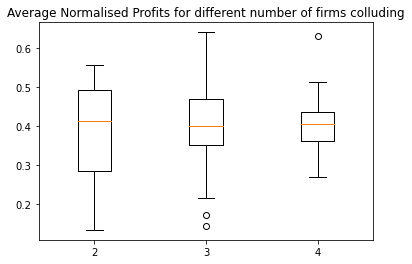

In [3]:
df = pd.DataFrame({"2":two_firm, "3":three_firm, "4":four_firm})

plt.title("Average Normalised Profits for different number of firms colluding")
plt.boxplot(df)
plt.xticks([1, 2, 3], ["2","3","4"])
plt.show()

# Average Normalised Profits for different number of firms Box-plot using Boltzmann

In [ ]:

two_firm = []
three_firm = []
four_firm = []

for i in range(10):
    two_firm.append(main.run(num_agent=2).normalised_profits.mean())
for i in range(10):
    three_firm.append(main.run(num_agent=3).normalised_profits.mean())
for i in range(10):
    four_firm.append(main.run(num_agent=4).normalised_profits.mean())

# Heat Map of Normalised Profits for grid values of $\alpha$ and $\beta$

In [ ]:
matrix = []
for alpha in np.arange(0.01,0.2,0.01):
    lst = []
    for beta in np.arange(0.01,2,0.02):
        lst.append(main.run(alpha = alpha, beta = beta*1e-5).normalised_profits.mean())
    matrix.append(lst)

<ipython-input-41-1892dc5e3da0>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  yticks = np.linspace(0, len(alpha_names) - 1, num_ticks, dtype=np.int)


Text(0.5, 1.0, 'Average normalised profits for a Grid of Values of $\\alpha$ and $\\beta$')

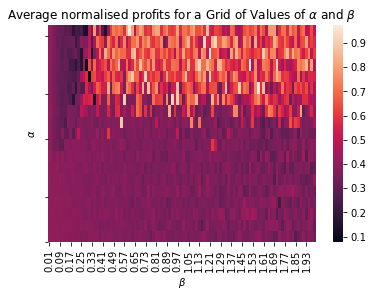

In [41]:
alpha_names = [round(alpha,2) for alpha in np.arange(0.01,0.2,0.01)]
beta_names = [round(beta,2) for beta in np.arange(0.01,2,0.02)]
num_ticks = 5
yticks = np.linspace(0, len(alpha_names) - 1, num_ticks, dtype=np.int)
yticklabels = [alpha_names[idx] for idx in yticks]

df = pd.DataFrame(matrix, index=alpha_names, columns=beta_names)
heatmap_result = sns.heatmap(df, yticklabels=yticklabels)
heatmap_result.set_yticks(yticks)
heatmap_result.invert_yaxis()

plt.xlabel(r'$\beta$')
plt.ylabel(r'$\alpha$')
plt.title(r'Average normalised profits for a Grid of Values of $\alpha$ and $\beta$')